In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     # Data Visualisation
import seaborn as sns
import sklearn

In [3]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
m = len(housing)
m

545

In [5]:
housing.shape

(545, 13)

In [6]:
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
           
# Check the housing dataframe now
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [7]:
#Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)
df_train.shape

(436, 13)

In [8]:
df_test.shape

(109, 13)

In [9]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_Newtrain = df_train[num_vars]
df_Newtest = df_test[num_vars]
df_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
22,8050,3,1,1,1,1,1,0,1,1,0,8645000
41,6360,3,2,4,1,0,0,0,1,0,1,7840000
91,6750,2,1,1,1,1,1,0,0,2,1,6419000
118,6420,3,1,1,1,0,1,0,1,0,1,5950000
472,3630,4,1,2,1,0,0,0,0,3,0,3010000


In [10]:
df_Newtrain.shape

(436, 12)

In [11]:
y_Newtrain = df_Newtrain.pop('price')
X_Newtrain = df_Newtrain

In [12]:
X_Newtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
22,8050,3,1,1,1,1,1,0,1,1,0
41,6360,3,2,4,1,0,0,0,1,0,1
91,6750,2,1,1,1,1,1,0,0,2,1
118,6420,3,1,1,1,0,1,0,1,0,1
472,3630,4,1,2,1,0,0,0,0,3,0


In [13]:
y_Newtrain.head()

22     8645000
41     7840000
91     6419000
118    5950000
472    3010000
Name: price, dtype: int64

In [14]:
y = y_Newtrain.values
print('y = ', y[: 10])

y =  [ 8645000  7840000  6419000  5950000  3010000  3850000 12250000  4480000
  5110000  4319000]


In [15]:
# training set

X1 = df_Newtrain.values[:, 0]                
X2 = df_Newtrain.values[:, 1]               
X3 = df_Newtrain.values[:, 2]               
X4 = df_Newtrain.values[:, 3]                
X5 = df_Newtrain.values[:, 4]              
X6 = df_Newtrain.values[:, 5]      
X7 = df_Newtrain.values[:, 6]      
X8 = df_Newtrain.values[:, 7]      
X9 = df_Newtrain.values[:, 8]      
X10 = df_Newtrain.values[:, 9]     
X11 = df_Newtrain.values[:, 10]     

In [16]:
m = len(X_Newtrain)         # size of training set
X_0 = np.ones((m, 1))        
X_0 [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [17]:
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_4 = X4.reshape(m, 1)
X_5 = X5.reshape(m, 1)
X_6 = X6.reshape(m, 1)
X_7 = X7.reshape(m, 1)
X_8 = X8.reshape(m, 1)
X_9 = X9.reshape(m, 1)
X_10 = X10.reshape(m, 1)
X_11 = X11.reshape(m, 1)

In [18]:
# Stacking from X_0 to X_11 horizotally
# This is the final X Matrix for training

X = np.hstack((X_0, X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10, X_11))
X [: 5]

array([[1.00e+00, 8.05e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 0.00e+00],
       [1.00e+00, 6.36e+03, 3.00e+00, 2.00e+00, 4.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 6.75e+03, 2.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        1.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 2.00e+00, 1.00e+00],
       [1.00e+00, 6.42e+03, 3.00e+00, 1.00e+00, 1.00e+00, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00],
       [1.00e+00, 3.63e+03, 4.00e+00, 1.00e+00, 2.00e+00, 1.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 3.00e+00, 0.00e+00]])

In [19]:
theta = np.zeros(12)
theta

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
y_Newtest = df_Newtest.pop('price')
X_Newtest = df_Newtest

In [21]:
X_Newtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
265,2880,3,1,2,1,0,0,0,0,0,1
54,6000,3,2,2,1,1,0,0,1,1,0
171,10269,3,1,1,1,0,0,0,0,1,1
244,5320,3,1,2,1,1,1,0,0,0,1
268,4950,4,1,2,1,0,0,0,1,0,0


In [22]:
y_Newtest.head()

265    4403000
54     7350000
171    5250000
244    4550000
268    4382000
Name: price, dtype: int64

In [23]:
y_test = y_Newtest.values
print('y_test = ', y_test[: 10])

y_test =  [4403000 7350000 5250000 4550000 4382000 4690000 8540000 5250000 2730000
 5950000]


In [24]:
X1_test = df_Newtest.values[:, 0]                
X2_test = df_Newtest.values[:, 1]                 
X3_test = df_Newtest.values[:, 2]              
X4_test = df_Newtest.values[:, 3]               
X5_test = df_Newtest.values[:, 4]    
X6_test = df_Newtest.values[:, 5]               
X7_test = df_Newtest.values[:, 6]              
X8_test = df_Newtest.values[:, 7]               
X9_test = df_Newtest.values[:, 8]                
X10_test = df_Newtest.values[:, 9]    
X11_test = df_Newtest.values[:, 10]   

In [25]:
m_test = len(X_Newtest)             # size of validation set
X_0_test = np.ones((m_test, 1))     
X_0_test [: 5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [26]:
X_1_test = X1_test.reshape(m_test, 1)
X_2_test = X2_test.reshape(m_test, 1)
X_3_test = X3_test.reshape(m_test, 1)
X_4_test = X4_test.reshape(m_test, 1)
X_5_test = X5_test.reshape(m_test, 1)
X_6_test = X6_test.reshape(m_test, 1)
X_7_test = X7_test.reshape(m_test, 1)
X_8_test = X8_test.reshape(m_test, 1)
X_9_test = X9_test.reshape(m_test, 1)
X_10_test = X10_test.reshape(m_test, 1)
X_11_test = X11_test.reshape(m_test, 1)

In [27]:
# Stacking X_0_test through X_11_test horizotally
# This is the final X Matrix for validation

X_test = np.hstack((X_0_test, X_1_test, X_2_test, X_3_test, X_4_test, X_5_test, X_6_test, X_7_test, X_8_test, X_9_test, X_10_test, X_11_test))
X_test [: 5]

array([[1.0000e+00, 2.8800e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 6.0000e+03, 3.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00],
       [1.0000e+00, 1.0269e+04, 3.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 1.0000e+00],
       [1.0000e+00, 5.3200e+03, 3.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00],
       [1.0000e+00, 4.9500e+03, 4.0000e+00, 1.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00]])

In [28]:
# defining function for computing the cost for linear regression

def compute_cost(X, y, theta, m):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [29]:
cost = compute_cost(X, y, theta, m)
cost

13238799902211.697

In [30]:
# gradient descent algorithm

def gradient_descent(X, y, theta, alpha, iterations):
    cost_history = np.zeros(iterations)
    cost_test = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, y, theta, m)                     # loss for training set
        cost_test[i] = compute_cost(X_test, y_test, theta, m_test)         # loss for validation set
    
    return theta, cost_history, cost_test

In [44]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 200;
alpha = 0.00000001

In [45]:
# Computing final theta values and cost/losses for training and validation set

theta, cost_history, cost_test = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta=', theta)
print('cost_history =', cost_history)
print('cost_test =', cost_test)

Final value of theta= [8.64439110e-01 8.61911599e+02 3.15030693e+00 1.78128968e+00
 2.71024998e+00 7.48158665e-01 3.07279813e-01 4.84279951e-01
 1.42885945e-01 6.63340927e-01 6.85780551e-01 3.32226532e-01]
cost_history = [7.17395237e+12 4.29408707e+12 2.92659610e+12 2.27724920e+12
 1.96890975e+12 1.82249615e+12 1.75297229e+12 1.71995918e+12
 1.70428303e+12 1.69683925e+12 1.69330459e+12 1.69162615e+12
 1.69082912e+12 1.69045063e+12 1.69027089e+12 1.69018551e+12
 1.69014495e+12 1.69012566e+12 1.69011648e+12 1.69011210e+12
 1.69011000e+12 1.69010897e+12 1.69010846e+12 1.69010820e+12
 1.69010805e+12 1.69010795e+12 1.69010789e+12 1.69010783e+12
 1.69010778e+12 1.69010773e+12 1.69010769e+12 1.69010764e+12
 1.69010760e+12 1.69010755e+12 1.69010751e+12 1.69010746e+12
 1.69010742e+12 1.69010737e+12 1.69010733e+12 1.69010728e+12
 1.69010724e+12 1.69010719e+12 1.69010715e+12 1.69010710e+12
 1.69010706e+12 1.69010701e+12 1.69010697e+12 1.69010692e+12
 1.69010688e+12 1.69010683e+12 1.69010679e+12 1

Text(0.5, 1.0, 'Convergence of Gradient Descent')

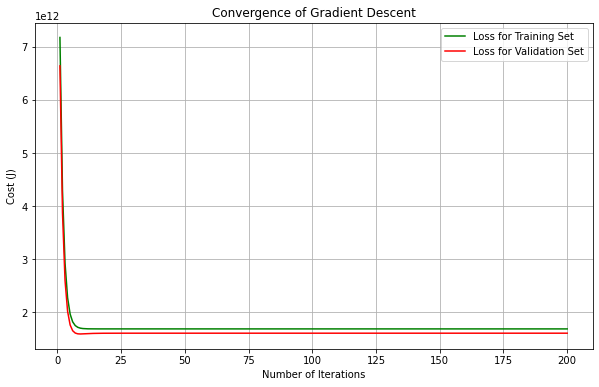

In [34]:
plt.plot(range(1, iterations + 1),cost_history, color='green', label= 'Loss for Training Set')
plt.plot(range(1, iterations + 1),cost_test, color='red', label= 'Loss for Validation Set')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.legend()
plt.xlabel('Number of Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent')